![](img/575_banner.png)

# Lecture 5: Topic Modeling

UBC Master of Data Science program, 2022-23

Instructor: Varada Kolhatkar

## Lecture plan, imports, LO

### Lecture plan 

- Activity and motivation (~5 mins)
- Introduction and intuition (~5 mins)
- LDA (~25 mins)
- iClicker and Q&A (~5 mins)
- Break (~5 mins)
- Topic modeling with Python (~10 mins)
- Advanced topic modeling with `Top2Vec` and `BERTTopic` (~10 mins)
- Evaluation of topic models (~ 5 mins)
- Final comments and summary (~2 mins)

<br><br>

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

<br><br>

### Learning outcomes

From this lesson you will be able to

- Explain the general idea of topic modeling.
- Name the two main approaches for topic modeling. 
- Explain the difference between document clustering and topic modeling.  
- Broadly explain the difference between LSA and LDA.
- Broadly explain the data generation process given an LDA topic model.  
- Explain at a high level how topic assignments are updated in the LDA model. 
- Explain the importance of preprocessing in topic modeling. 
- Carry out topic modeling with [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) as well as [gensim](https://radimrehurek.com/gensim/models/ldamodel.html). 
- Visualize topics identified by topic modeling. 
- Interpret the output of topic modeling. 
- Name a few possible ways to evaluate a topic model. 
- Explore coherence scores to pick the number of topics.
- Use `Top2Vec` for topic modeling. 

<br><br><br><br>

## Why topic modeling? 

### Topic modeling introduction activity (~5 mins)

- Consider the following documents. 

In [3]:
toy_df = pd.read_csv("data/toy_clustering.csv")
toy_df

text
0                                           famous fashion model
1                                          elegant fashion model
2   fashion model at famous probabilistic topic model conference
3                                    fresh elegant fashion model
4                                  famous elegant fashion model 
5                                       probabilistic conference
6                                   creative probabilistic model
7                                model diet apple kiwi nutrition
8                                            probabilistic model
9                                          kiwi health nutrition
10                                 fresh apple kiwi health diet 
11                                              health nutrition
12                              fresh apple kiwi juice nutrition
13                          probabilistic topic model conference
14                                     probabilistic topic model

**Discuss the following questions with your neighbour and write your answers in this [Google doc]( 
https://docs.google.com/document/d/1ZSvfUsGo7uY82mK_O1Hso_nRbbD8oIhELVMCwzOAR0s/edit?usp=sharing
)**. 
1. Suppose you are asked to cluster these documents manually. How many clusters would you identify?
2. What are the prominent words in each cluster? 
4. Are there documents which are a mixture of multiple clusters? 

### Topic modeling motivation

- Humans are pretty good at reading and understanding a document and answering questions such as 
    - What is it about?  
    - Which documents is it related to?     
- What if you're given a large collection of documents on a variety of topics.     

### Example: A corpus of news articles 

![](img/TM_NYT_articles.png)

<!-- <center> -->
<!-- <img src="img/TM_NYT_articles.png" height="2000" width="2000">  -->
<!-- </center> -->

### Example: A corpus of food magazines 

![](img/TM_food_magazines.png)

<!-- <center> -->
<!-- <img src="img/TM_food_magazines.png" height="2000" width="2000">  -->
<!-- </center> -->

### A corpus of scientific articles

![](img/TM_science_articles.png)

<!-- <img src="img/TM_science_articles.png" height="2000" width="2000">  -->


(Credit: [Dave Blei's presentation](http://www.cs.columbia.edu/~blei/talks/Blei_Science_2008.pdf))

<br><br><br><br>

- It would take years to read all documents and organize and categorize them so that they are easy to search.
- You need an automated way
    - to get an idea of what's going on in the data or 
    - to pull documents related to a certain topic
- **Topic modeling** gives you an ability to summarize the major themes in a large collection of documents (corpus). 
    - Example: The major themes in a collection of news articles could be 
        - **politics**
        - **entertainment**
        - **sports**
        - **technology**
        - ...    

- Topic modeling is a great EDA tool to get a sense of what's going on in a large corpus. 
- Some examples
    - If you want to pull documents related to a particular lawsuit. 
    - You want to examine people's sentiment towards a particular candidate and/or political party and so you want to pull tweets or Facebook posts related to election.   

### How do you do topic modeling? 

- A common tool to solve such problems is **unsupervised ML methods**.
- Given the hyperparameter $K$, the goal of topic modeling is to describe a set of documents using $K$ "topics".
- In unsupervised setting, the input of topic modeling is 
    - A large collection of documents
    - A value for the hyperparameter $K$ (e.g., $K = 3$)
- and the output is 
    1. Topic-words association 
        - For each topic, what words describe that topic? 
    2. Document-topics association
        - For each document, what topics are expressed by the document? 

### Topic modeling: Example

- Topic-words association 
    - For each topic, what words describe that topic?  
    - **A topic is a mixture of words.** 

![](img/topic_modeling_word_topics.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_word_topics.png" height="1000" width="1000">  -->
<!-- </center>     -->

### Topic modeling: Example

- Document-topics association 
    - For each document, what topics are expressed by the document?
    - **A document is a mixture of topics.** 
    
![](img/topic_modeling_doc_topics.png)

<!-- <center>     -->
<!-- <img src="img/topic_modeling_doc_topics.png" height="800" width="800">  -->
<!-- </center>     -->

### Topic modeling examples

### Topic modeling: Input 

![](img/TM_science_articles.png)

<!-- <center> -->
<!-- <img src="img/TM_science_articles.png" height="2000" width="2000">  -->
<!-- </center>     -->
    
Credit: [David Blei's presentation](http://www.cs.columbia.edu/~blei/talks/Blei_Science_2008.pdf)

### Topic modeling: output

![](img/TM_topics.png)

<!-- <center> -->
<!-- <img src="img/TM_topics.png" height="900" width="900">  -->
<!-- </center>     -->


(Credit: [David Blei's presentation](http://www.cs.columbia.edu/~blei/talks/Blei_Science_2008.pdf))

### Topic modeling: output with interpretation
- Assigning labels is a human thing. 

![](img/TM_topics_with_labels.png)

<!-- <center> -->
<!-- <img src="img/TM_topics_with_labels.png" height="800" width="800">  -->
<!-- </center>     -->

(Credit: [David Blei's presentation](http://www.cs.columbia.edu/~blei/talks/Blei_Science_2008.pdf))

### LDA topics in Yale Law Journal

![](img/TM_yale_law_journal.png)

<!-- <center> -->
<!-- <img src="img/TM_yale_law_journal.png" height="1500" width="1500">  -->
<!-- </center>     -->

(Credit: [David Blei's paper](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf))

### LDA topics in social media

![](img/TM_health_topics_social_media.png)

<!-- <center> -->
<!-- <img src="img/TM_health_topics_social_media.png" height="1300" width="1300">  -->
<!-- </center> -->

(Credit: [Health topics in social media](https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0103408.g002))

- Based on the tools in your toolbox what would you use for topic modeling? 
<br><br><br><br><br><br><br><br>

- Two main approaches 
    - Topic modeling as matrix factorization (LSA)
    - Latent Dirichlet Allocation (LDA) 

### Topic modeling as matrix factorization

- We have seen this before in DSCI 563! 
- You can think of topic modeling as a matrix factorization problem. 

$$X_{n \times d} \approx Z_{n \times k}W_{k \times d}$$

- Where 
    - $n \rightarrow $ Number of documents
    - $k \rightarrow $ Number of topics
    - $d \rightarrow $ Number of features (e.g., the size of vocabulary)

- $Z$ gives us document-topic assignments and $W$ gives us topic-word assignments.    
- This is LSA and we used `sklearn`'s [`TruncatedSVD`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) for matrix factorization using SVD (without centering the data). 
- The idea is to reduce the dimensionality of the data to extract some semantically meaningful components. 

Let's try LSA on the toy dataset above.  

In [4]:
toy_df

text
0                                           famous fashion model
1                                          elegant fashion model
2   fashion model at famous probabilistic topic model conference
3                                    fresh elegant fashion model
4                                  famous elegant fashion model 
5                                       probabilistic conference
6                                   creative probabilistic model
7                                model diet apple kiwi nutrition
8                                            probabilistic model
9                                          kiwi health nutrition
10                                 fresh apple kiwi health diet 
11                                              health nutrition
12                              fresh apple kiwi juice nutrition
13                          probabilistic topic model conference
14                                     probabilistic topic model

Let's get BOW representation of the documents. 

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
bow = cv.fit_transform(toy_df["text"]).toarray()
bow_df = pd.DataFrame(bow, columns=cv.get_feature_names_out(), index=toy_df["text"])
bow_df

apple  \
text                                                                  
famous fashion model                                              0   
elegant fashion model                                             0   
fashion model at famous probabilistic topic model conference      0   
fresh elegant fashion model                                       0   
famous elegant fashion model                                      0   
probabilistic conference                                          0   
creative probabilistic model                                      0   
model diet apple kiwi nutrition                                   1   
probabilistic model                                               0   
kiwi health nutrition                                             0   
fresh apple kiwi health diet                                      1   
health nutrition                                                  0   
fresh apple kiwi juice nutrition                                  1   
probabilistic topic model conference                              0   
probabilistic topic model                                         0   

                                                              conference  \
text                                                                       
famous fashion model                                                   0   
elegant fashion model                                                  0   
fashion model at famous probabilistic topic model conference           1   
fresh elegant fashion model                                            0   
famous elegant fashion model                                           0   
probabilistic conference                                               1   
creative probabilistic model                                           0   
model diet apple kiwi nutrition                                        0   
probabilistic model                                                    0   
kiwi health nutrition                                                  0   
fresh apple kiwi health diet                                           0   
health nutrition                                                       0   
fresh apple kiwi juice nutrition                                       0   
probabilistic topic model conference                                   1   
probabilistic topic model                                              0   

                                                              creative  diet  \
text                                                                           
famous fashion model                                                 0     0   
elegant fashion model                                                0     0   
fashion model at famous probabilistic topic model conference         0     0   
fresh elegant fashion model                                          0     0   
famous elegant fashion model                                         0     0   
probabilistic conference                                             0     0   
creative probabilistic model                                         1     0   
model diet apple kiwi nutrition                                      0     1   
probabilistic model                                                  0     0   
kiwi health nutrition                                                0     0   
fresh apple kiwi health diet                                         0     1   
health nutrition                                                     0     0   
fresh apple kiwi juice nutrition                                     0     0   
probabilistic topic model conference                                 0     0   
probabilistic topic model                                            0     0   

                                                              elegant  famous  \
text                                                                            
famous fashion model                  

- Let's extract **latent features** from this data. 

In [6]:
from sklearn.pipeline import make_pipeline
lsa_pipe = make_pipeline(
    CountVectorizer(stop_words="english"), TruncatedSVD(n_components=3)
)

Z = lsa_pipe.fit_transform(toy_df["text"]);

In [7]:
pd.DataFrame(
    np.round(Z, 4),
    columns=["latent topic 1 ", "latent topic 2", "latent topic 3"],
    index=toy_df["text"],
)

latent topic 1   \
text                                                                            
famous fashion model                                                   1.3170   
elegant fashion model                                                  1.2495   
fashion model at famous probabilistic topic model conference           2.8596   
fresh elegant fashion model                                            1.3314   
famous elegant fashion model                                           1.4893   
probabilistic conference                                               0.5718   
creative probabilistic model                                           1.1374   
model diet apple kiwi nutrition                                        0.9899   
probabilistic model                                                    1.0893   
kiwi health nutrition                                                  0.1632   
fresh apple kiwi health diet                                           0.3019   
health nutrition                                                       0.0888   
fresh apple kiwi juice nutrition                                       0.3019   
probabilistic topic model conference                                   1.5426   
probabilistic topic model                                              1.3320   

                                                              latent topic 2  \
text                                                                           
famous fashion model                                                 -0.1541   
elegant fashion model                                                -0.0921   
fashion model at famous probabilistic topic model conference         -0.4921   
fresh elegant fashion model                                           0.2235   
famous elegant fashion model                                         -0.1560   
probabilistic conference                                             -0.2149   
creative probabilistic model                                         -0.1828   
model diet apple kiwi nutrition                                       1.6467   
probabilistic model                                                  -0.1682   
kiwi health nutrition                                                 1.2857   
fresh apple kiwi health diet                                          1.8677   
health nutrition                                                      0.7542   
fresh apple kiwi juice nutrition                                      1.8677   
probabilistic topic model conference                                 -0.3380   
probabilistic topic model                                            -0.2547   

                                                              latent topic 3  
text                                                                          
famous fashion model                                                  0.7692  
elegant fashion model                                                 0.9877  
fashion model at famous probabilistic topic model conference         -0.3107  
fresh elegant fashion model                                           1.1163  
famous elegant fashion model                                          1.2093  
probabilistic conference                                             -0.8377  
creative probabilistic model                                         -0.5709  
model diet apple kiwi nutrition                                      -0.1801  
probabilistic model                                                  -0.4951  
kiwi health nutrition                                                -0.2039  
fresh apple kiwi health diet                                         -0.0742  
health nutrition                                                     -0.1332  
fresh apple kiwi juice nutrition                                     -0.0742  
probabilistic topic model conference                                 -1.0799  
probabilistic topic model                                  

Let's examine the components learned by LSA. 
- How much variance is covered by the components? 

In [8]:
lsa_pipe.named_steps["truncatedsvd"].explained_variance_ratio_.sum()

0.6558779404028752

In [9]:
W = lsa_pipe.named_steps['truncatedsvd'].components_
W

array([[ 0.06747017,  0.21056851,  0.04815134,  0.05468907,  0.17230783,
         0.23986307,  0.34912148,  0.0819255 ,  0.02344878,  0.01278109,
         0.07437837,  0.72804564,  0.06535676,  0.3612223 ,  0.24275193],
       [ 0.42900399, -0.08329132, -0.01457154,  0.28013182, -0.00196643,
        -0.06394139, -0.05347004,  0.31555664,  0.31147456,  0.14887217,
         0.53148783, -0.03665847,  0.44273421, -0.13157525, -0.08646649],
       [-0.04364109, -0.29598848, -0.07583183, -0.03377992,  0.44010496,
         0.22151674,  0.50099603,  0.1285553 , -0.05464361, -0.00986116,
        -0.07072982,  0.04664235, -0.07856237, -0.54170558, -0.28884399]])

In [10]:
print("W.shape: {}".format(W.shape))
vocab = lsa_pipe.named_steps['countvectorizer'].get_feature_names_out()

W.shape: (3, 15)


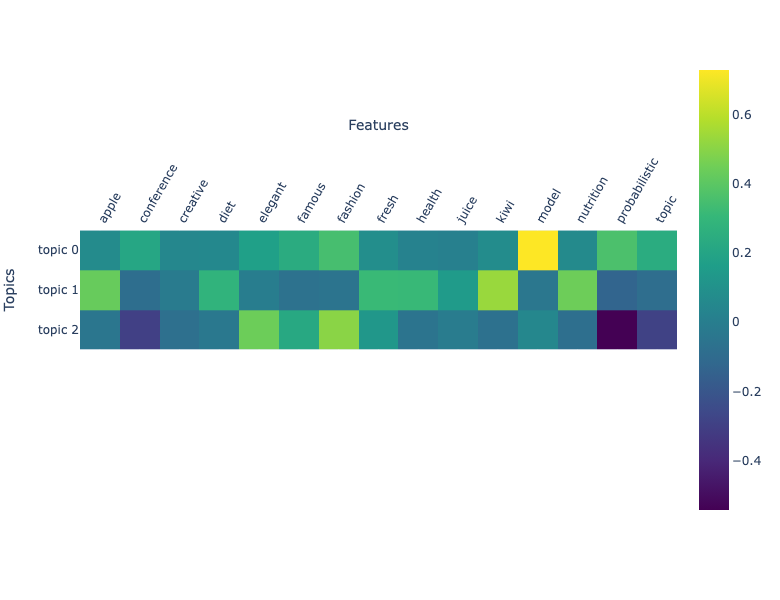

In [11]:
import sys
sys.path.append("code/.")
from utils import *

plot_lda_w_vectors(W, ['topic 0', 'topic 1', 'topic 2'], vocab, width=800, height=600)

Let's print the topics: 

In [12]:
W_sorted = np.argsort(W, axis=1)[:, ::-1]

feature_names = np.array(
    lsa_pipe.named_steps["countvectorizer"].get_feature_names_out()
)
print_topics(
    topics=[0, 1, 2], feature_names=feature_names, sorting=W_sorted, n_words=5
)

topic 0       topic 1       topic 2       
--------      --------      --------      
model         kiwi          fashion       
probabilistic nutrition     elegant       
fashion       apple         famous        
topic         fresh         fresh         
famous        health        model         




- Our features are word counts. 
- LSA has learned useful "concepts" or latent features from word count features. 

<br><br><br><br>

## Topic modeling with Latent Dirichlet Allocation (LDA)

Attribution: Material and presentation in the next slides is adapted from [Jordan Boyd-Graber's excellent material on LDA](http://users.umiacs.umd.edu/~jbg/teaching/CMSC_726/16a.pdf).

- Another common approach to topic modeling
- A Bayesian, probabilistic, and generative approach  
    - Similar to Gaussian Mixture Models (GMMs), you can think of this as a procedure to generate the data
- Developed by [David Blei](http://www.cs.columbia.edu/~blei/) and colleagues in 2003. 
    * One of the most cited papers in the last 20 years.
- DISCLAIMER    
    - We won't go into the math because it's a bit involved and we do not have the time. 
    - My goal is to give you an intuition of the model and show you how to use it to solve topic modeling problems. 

Suppose you are asked to create a probabilistic generative story of how our toy data came to be. 

In [13]:
toy_df

text
0                                           famous fashion model
1                                          elegant fashion model
2   fashion model at famous probabilistic topic model conference
3                                    fresh elegant fashion model
4                                  famous elegant fashion model 
5                                       probabilistic conference
6                                   creative probabilistic model
7                                model diet apple kiwi nutrition
8                                            probabilistic model
9                                          kiwi health nutrition
10                                 fresh apple kiwi health diet 
11                                              health nutrition
12                              fresh apple kiwi juice nutrition
13                          probabilistic topic model conference
14                                     probabilistic topic model

<br><br>
**Let's assume all documents have $d$ words and word order doesn't matter.**

### Approach 1: Multinomial distribution of words

- Assume that each word $w_j$ comes from a multinomial distribution over all words.
- To generate a document with $d$ words, sample $d$ words from the multinomial distribution over words.   
- **Drawback**: Misses that some documents are about different topics
- **Want**: We want the word distribution to depend upon the topic

### Approach 2: Mixture of multinomial distributions of words

- How about using a mixture model of "topics"?
    - Each component of a mixture has its own multinomial distribution over words

- To generate a document with $d$ words 
    - sample a topic $z$ from the mixture of topics 
    - sample a word $d$ times from topic $z$'s distribution 
    
- **Drawback**: Misses that documents usually contain multiple topics

### Approach 3: Multi-topic mixture of multinomial 
- Let's introduce a vector $\theta$ of topic proportions 
- To generate a document with $d$ words given probabilities $\theta$
    - sample $d$ topics from $\theta$
    - for each sampled topic, sample a word from the topic distribution

How do we compute $\theta$ for a new document? 

### Approach 4: Latent Dirichlet Allocation (LDA)

- LDA puts a prior on topic proportions $\theta$
- To generate a document with $d$ words  
    - sample document topic proportions $\theta$ from its prior
    - sample $d$ topics from $\theta$
    - for each sampled topic, sample a word from the topic distribution.      

### Generative story of LDA
- The story that tells us how our data was generated. 
- The generative story of LDA to create Document 1 below:     
    1. Pick a topic from the topic distribution for Document 1. 
    2. Pick a word from the selected topic's word distribution. 
- Not a realistic story but a mathematically useful story. 

![](img/topic_modeling_generative_story.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_generative_story.png" height="600" width="600">  -->
<!-- </center>     -->

- Similar to LSA, we fix the number of topics $K$
- Topic-word distribution: Each topic is a multinomial distribution over words
- Document-topic distribution: Each document is a multinomial distribution over corpus-wide topics

![](img/TM_dist_topics_words_blei.png)

<!-- <center> -->
<!-- <img src="img/TM_dist_topics_words_blei.png" height="1000" width="1000">  -->
<!-- </center>     -->

(Credit: [David Blei's presentation](http://www.cs.columbia.edu/~blei/talks/Blei_Science_2008.pdf))

- Topic-word distribution
    - If I pick a word from the pink topic, the probability of it being _life_ is 0.02, _evolve_ is 0.01, and _organism_ is 0.01. 
    - Equivalent to the components $W$ in LSA. 

- Document-topic distribution
    - If I pick a random word from the document, how likely it's going to be from yellow topic vs. pink topic vs. cyan topic. 
    - Equivalent to the latent representation $Z$ in LSA. 

### LDA high-level idea

- How can we estimate the following latent variables that characterize the underlying topic structure of the document collection? 
    - the topic assignments for each word in a given document
    - the topic-word distributions 
    - the document-topic distributions 
- Typically fit using **Bayesian inference**
    - Most common algorithm is MCMC 

```{note} 
(Optional) The Dirichlet distribution is used as a prior distribution in the Bayesian inference process of estimating the topic-word and document-topic distributions because it has some desirable properties such as being a conjugate prior, which means that the posterior has the same form as that of the prior which allows us to compute the posterior distribution of the topic-word and document-topic distributions, given the observed data (i.e., the words in the documents) analytically in closed form, which simplifies the inference process.  
```

### (Optional) Plate notation

- Used in Bayesian inference for representing variables that repeat. 
- It shows the generative process of the LDA model. It also shows the dependency structure in the probability distribution.
- We are not going into the details but I would like you to be familiar with this picture at a high-level because it's likely that you might see it in the context of topic modeling. 

![](img/topic_modeling_plate_diagram.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_plate_diagram.png" height="500" width="500">  -->
<!-- </center>     -->

- $\beta_k \rightarrow$ Distribution over words for topic $k$
- $\theta_d \rightarrow$ Distribution over topics for document $d$ 
- $w_n \rightarrow$ word
- $Z_n \rightarrow$ topic
- $N \rightarrow$ Size of the vocabulary
- $M \rightarrow$ Number of documents
- $\lambda \rightarrow$ Hyperparameter for word proportion
- $\alpha\rightarrow$ Hyperparameter for topic proportion  

### (Optional) Mathematical presentation of the generative story (plate diagram)

![](img/topic_modeling_plate_diagram.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_plate_diagram.png" height="500" width="500">  -->
<!-- </center>     -->


- For each topic $k \in \{1, \dots, K\}$ draw a multinomial distribution $\beta_k$ from a Dirichlet distribution with parameter $\lambda$. 
- For each document $d \in \{1, \dots, M\}$, draw a multinomial distribution $\theta_d$
from a Dirichlet distribution with parameter $\alpha$. 
- For each word position $n \in \{1, \dots, N\}$, select a hidden topic $Z_n$ from the multinomial distribution parameterized by $\theta$.
- Choose the observed word $w_n$ from the distribution $\beta_{Z_n}$. 

[Source](http://users.umiacs.umd.edu/~jbg/teaching/CMSC_726/16a.pdf)

### (Optional) LDA Inference

- Infer the underlying topic structure in the documents. In particular, 
    - Learn the discrete probability distributions of topics in each document
    - Learn the discrete probability distributions of words in each topic

### (Optional) LDA Inference

- We are interested in the posterior distribution: $P(z, \beta, \theta| w_n, \alpha, \lambda)$
- Observations: words. Everything else is hidden (latent). 

![](img/topic_modeling_plate_diagram.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_plate_diagram.png" height="600" width="600">  -->
<!-- </center>     -->


- $\lambda$: Hyperparameter for word proportion
    - High $\lambda$ &rarr; every topic contains a mixture of most of the words
    - Low $\lambda$ &rarr; every topic contains a mixture of only few words
    
- $\alpha$: Hyperparameter for topic proportion  
   - High $\alpha$ &rarr; every document contains a mixture of most of the topics
   - Low $\alpha$ &rarr; every document is representative of only a few topics    

### (Optional) Calculating the conditional probability

- Sets up a Markov chain that converges into the posterior distribution of the model parameters or word–topic assignments.
- Two components
    - How much this document likes topic $k$: 
    $$\frac{n_{d,k} + \alpha_k}{\sum^K_i n_{d,i} + \alpha_i}$$
    - How much this topic likes word $w_{d,n}$: $$\frac{V_{k, w_{d,n}} + \lambda_{w_{d,n}}}{\sum_i V_{k,i} + \lambda_i}$$ 
- The conditional probability of word topic assignment given everything else in the model: 

$$\frac{n_{d,k} + \alpha_k}{\sum^K_i n_{d,i} + \alpha_i} \frac{V_{k, w_{d,n}} + \lambda_{w_{d,n}}}{\sum_i V_{k,i} + \lambda_i}$$

- $n_{d,k} \rightarrow$ number of times document $d$ uses topic $k$ 
- $V_{k, w_{d,n}} \rightarrow$ number of times topic $k$ uses word type $w_{d,n}$
- $\alpha_k \rightarrow$ Dirichlet parameter for document to topic distribution
- $\lambda_{w_{d,n}} \rightarrow$ Dirichlet parameter for topic to word distribution

### (Optional) LDA algorithm 

- Suppose $K$ is number of topics
- For each iteration $i$
    - For each document $d$ and word $n$ currently assigned to topic $Z_{old}$
        - Decrement $n_{d,Z_{old}}$ and $V_{Z_{old}, w_{d,n}}$
        - Sample $Z_{new} = k$ with probability proportional to $\frac{n_{d,k} + \alpha_k}{\sum^K_i n_{d,i} + \alpha_i} \frac{V_{k, w_{d,n}} + \lambda_{w_{d,n}}}{\sum_i V_{k,i} + \lambda_i}$
        - Increment $n_{d, Z_{new}} and V_{Z_{new}, w_{d,n}}$
    

### How do we find the posterior distribution? 

- We are interested in the posterior distribution, i.e., the updated probability distribution of the topic assignments for each word in the document, given the observed words in the document and the current estimate of the topic proportions for that document
- How do we find it? 
    - **Gibbs sampling** (very accurate but very slow, appropriate for small datasets)
    - Variational inference (faster but less accurate, extension of expectation maximization, appropriate for medium to large datasets)    
    
- Next let's look at an intuition of Gibbs sampling for topic modeling. 

### LDA algorithm: Gibbs sampling 

- Suppose the number of topics is $3$ and the topics are numbered $1, 2, 3$
- Calculate conditional probability of single word topic assignment conditioned on the rest of the parameters.
- Two components
    - How much a document likes the topic
    - How much a topic likes the word

![](img/topic_modeling_topic_word_assignment.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_topic_word_assignment.png" height="500" width="500">  -->
<!-- </center>     -->

### LDA algorithm example

#### Random topic assignment

- Randomly assign each word in each document to one of the topics. 
    - The same word in the vocabulary may have different topic assignments in different instances.  

#### Sample document and random topic assignment
- Consider this sample document (Document 10) with random topic assignment

![](img/topic_modeling_word_topic_assignment.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_word_topic_assignment.png" height="600" width="600">  -->
<!-- </center>     -->


- With the current topic assignment, here are the topic counts in our document 

![](img/topic_modeling_doc_topic_counts.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_doc_topic_counts.png" height="500" width="500">  -->
<!-- </center>     -->


#### Total topic counts

- Find out how much each word in the document is liked by each topic.
- For each word in our current document (Document 10), calculate how often that word occurs with each topic in all documents.
- The counts in the toy example below are made-up counts

![](img/topic_modeling_word_topic_counts.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_word_topic_counts.png" height="400" width="400">  -->
<!-- </center>     -->


We want to figure out a way to revise word-topic assignments. For that we sample a word-topic assignment and revise it assuming that we know everything else in the model.

#### Sample a word-topic assignment

- Suppose our sampled word-topic assignment is the word _probabilistic_ in Document 10 with assigned topic 3. 
- How often does Topic 3 occur in Document 10? __Once__. 
- How often does the word _probabilistic_ occur with Topic 3 in the corpus? __Twice__.  

<!-- <center> -->
![](img/topic_modeling_word_topic_assignment.png)
<!-- <img src="img/topic_modeling_word_topic_assignment.png" height="300" width="300">  -->

![](img/topic_modeling_doc_topic_counts.png)
<!-- <img src="img/topic_modeling_doc_topic_counts.png" height="300" width="300">  -->

![](img/topic_modeling_word_topic_counts.png)
<!-- <img src="img/topic_modeling_word_topic_counts.png" height="300" width="300">  -->
<!-- </center>     -->


#### Decrement counts

- We want to update the word topic assignment of _probabilistic_ and Topic 3. 
- Decrement the count of the word from the word-topic counts.

![](img/topic_modeling_count_decrement.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_count_decrement.png" height="600" width="600">  -->
<!-- </center> -->

#### Calculating conditional probability distribution 

- What is the topic preference of Document 10?
- What is the preference of the word _probabilistic_ for each topic?

<!-- <center> -->
![](img/topic_modeling_decremented_counts.png)
<!-- <img src="img/topic_modeling_decremented_counts.png" height="300" width="300">  -->

![](img/topic_modeling_conditional_proba.png)
<!-- <img src="img/topic_modeling_conditional_proba.png" height="400" width="400"> -->
<!-- </center>     -->


#### Updating topic assignment

- So update the topic of the current word _probabilistic_ in document 10 to **topic 1**
- Update the document-topic and word-topic counts accordingly. 

![](img/topic_modeling_update_count.png)

<!-- <center> -->
<!-- <img src="img/topic_modeling_update_count.png" height="600" width="600">  -->
<!-- </center> -->

#### Conclusion

- In one pass, the algorithm repeats the above steps for each word in the corpus
- If you do this for several passes, meaningful topics emerge. 

<br><br><br><br>

![](img/eva-coffee.png)

<br><br><br><br>

## ❓❓ Questions for you


### Exercise 5.1: Select all of the following statements which are **True** (iClicker)

- (A) Latent Dirichlet Allocation (LDA) is an unsupervised approach. 
- (B) The assumption in topic modeling is that different topics tend to use different words. 
- (C) We could use LSA for topic modeling, where $Z$ gives us the mixture of topics per document. 
- (D) In LDA topic model, a document is a mixture of multiple topics. 
- (E) If I train a topic model on a large collection of news articles with K = 10, I would get 10 topic labels (e.g., sports, culture, politics, finance) as output. 

<br><br><br><br>

```{admonition} Exercise 5.1: V's Solutions!
:class: tip, dropdown
- (A) True
- (B) True
- (C) True 
- (D) True
- (E) False
```

### Exercise 5.2: Questions for class discussion 

1. What's the difference between topic modeling and document clustering using algorithms such as K-Means clustering? 
2. Imagine that you are using LSA for topic modeling, where $X$ is bag-of-words representation of $N$ documents and $V$ features (number of words in the vocabulary). Explain which matrix would give you word distribution over topics and which matrix would give you topic distribution over documents.
$$X_{N \times V} = Z_{N \times K} W_{K \times V}$$



```{admonition} Exercise 5.2: V's Solutions!
:class: tip, dropdown
1. In clustering with K-Means, documents are grouped based on a similarity measure, and each document is assigned to a single cluster. In contrast, topic modeling produces distributions over words for each topic, as well as distributions over topics per document. Topic modeling can be thought of as a form of soft clustering, where documents are assigned to multiple topics based on their probability distributions rather than a single cluster.

2. $Z$ would give distribution over topics per document and 
$W$ would give distribution over words per topic.


```

<br><br><br><br>

## Topic modeling with Python


### Topic modeling pipeline 

- Preprocess your corpus. 
- Train LDA using `sklearn` or `Gensim`.
- Interpret your topics.     

### Data

Let's work with a slightly bigger corpus. We'll extract text from a few Wikipedia articles and apply topic modeling on these texts. 

In [14]:
import wikipedia

queries = [
    "Artificial Intelligence",
    "Supervised Machine Learning",
    "Supreme Court of Canada",
    "Peace, Order, and Good Government",
    "Canadian constitutional law",
    "ice hockey",
    "Google company",
    "Google litigation",
]
wiki_dict = {"wiki query": [], "text": []}
for i in range(len(queries)):
    text = wikipedia.page(queries[i]).content
    wiki_dict["text"].append(text)
    print(len(text))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

56093
26059
21621
15856
16999
72999
54468
19078


wiki query  \
0            Artificial Intelligence   
1        Supervised Machine Learning   
2            Supreme Court of Canada   
3  Peace, Order, and Good Government   
4        Canadian constitutional law   
5                         ice hockey   
6                     Google company   
7                  Google litigation   

                                                                                                                                                                                                      text  
0  Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to intelligence of humans and other animals. Example tasks in which this is done include speech recognition, compu...  
1  Supervised learning (SL) is a machine learning paradigm for problems where the available data consists of labeled examples, meaning that each data point contains features (covariates) and an assoc...  
2  The Supreme Court of Canada (SCC; French: Cour suprême du Canada, CSC) is the highest court in the judicial system of Canada. It comprises nine justices, whose decisions are the ultimate applicati...  
3  In many Commonwealth jurisdictions, the phrase "peace, order, and good government" (POGG) is an expression used in law to express the legitimate objects of legislative powers conferred by statute....  
4  Canadian constitutional law (French: droit constitutionnel du Canada) is the area of Canadian law relating to the interpretation and application of the Constitution of Canada by the courts. All la...  
5  Ice hockey (or simply hockey) is a team sport played on ice skates, usually on an ice skating rink with lines and markings specific to the sport. It belongs to a family of sports called hockey. In...  
6  Google LLC ( (listen)) is an American multinational technology company focusing on online advertising, search engine technology, cloud computing, computer software, quantum computing, e-commerce, ...  
7  Google has been involved in multiple lawsuits over issues such as privacy, advertising, intellectual property and various Google services such as Google Books and YouTube. The company's legal depa...

### Preprocessing the corpus 

- **Preprocessing is crucial!**
- Tokenization, converting text to lower case
- Removing punctuation and stopwords
- Discarding words with length < threshold or word frequency < threshold        
- Possibly lemmatization: Consider the lemmas instead of inflected forms. 
- Depending upon your application, restrict to specific part of speech;
    * For example, only consider nouns, verbs, and adjectives
    
We'll use [`spaCy`](https://spacy.io/) for preprocessing. 

In [17]:
# !python -m spacy download en_core_web_md

In [18]:
import spacy

nlp = spacy.load("en_core_web_md")

In [19]:
def preprocess_spacy(
    doc,
    min_token_len=2,
    irrelevant_pos=["ADV", "PRON", "CCONJ", "PUNCT", "PART", "DET", "ADP"],
):
    """
    Given text, min_token_len, and irrelevant_pos carry out preprocessing of the text
    and return a preprocessed string.

    Parameters
    -------------
    doc : (spaCy doc object)
        the spacy doc object of the text
    min_token_len : (int)
        min_token_length required
    irrelevant_pos : (list)
        a list of irrelevant pos tags

    Returns
    -------------
    (str) the preprocessed text
    """

    clean_text = []

    for token in doc:
        if (
            token.is_stop == False  # Check if it's not a stopword
            and len(token) > min_token_len  # Check if the word meets minimum threshold
            and token.pos_ not in irrelevant_pos
        ):  # Check if the POS is in the acceptable POS tags
            lemma = token.lemma_  # Take the lemma of the word
            clean_text.append(lemma.lower())
    return " ".join(clean_text)

In [20]:
wiki_df["text_pp"] = [preprocess_spacy(text) for text in nlp.pipe(wiki_df["text"])]

In [21]:
wiki_df

wiki query  \
0            Artificial Intelligence   
1        Supervised Machine Learning   
2            Supreme Court of Canada   
3  Peace, Order, and Good Government   
4        Canadian constitutional law   
5                         ice hockey   
6                     Google company   
7                  Google litigation   

                                                                                                                                                                                                      text  \
0  Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to intelligence of humans and other animals. Example tasks in which this is done include speech recognition, compu...   
1  Supervised learning (SL) is a machine learning paradigm for problems where the available data consists of labeled examples, meaning that each data point contains features (covariates) and an assoc...   
2  The Supreme Court of Canada (SCC; French: Cour suprême du Canada, CSC) is the highest court in the judicial system of Canada. It comprises nine justices, whose decisions are the ultimate applicati...   
3  In many Commonwealth jurisdictions, the phrase "peace, order, and good government" (POGG) is an expression used in law to express the legitimate objects of legislative powers conferred by statute....   
4  Canadian constitutional law (French: droit constitutionnel du Canada) is the area of Canadian law relating to the interpretation and application of the Constitution of Canada by the courts. All la...   
5  Ice hockey (or simply hockey) is a team sport played on ice skates, usually on an ice skating rink with lines and markings specific to the sport. It belongs to a family of sports called hockey. In...   
6  Google LLC ( (listen)) is an American multinational technology company focusing on online advertising, search engine technology, cloud computing, computer software, quantum computing, e-commerce, ...   
7  Google has been involved in multiple lawsuits over issues such as privacy, advertising, intellectual property and various Google services such as Google Books and YouTube. The company's legal depa...   

                                                                                                                                                                                                   text_pp  
0  artificial intelligence intelligence demonstrate machine oppose intelligence human animal example task include speech recognition computer vision translation natural language mapping input applica...  
1  supervised learning machine learn paradigm problem available datum consist label example mean datum point contain feature covariate associated label goal supervised learning algorithm learn functi...  
2  supreme court canada scc french cour suprême canada csc high court judicial system canada comprise justice decision ultimate application canadian law grant permission litigant year appeal decision...  
3  commonwealth jurisdiction phrase peace order good government pogg expression law express legitimate object legislative power confer statute phrase appear imperial acts parliament letters patent co...  
4  canadian constitutional law french droit constitutionnel canada area canadian law relate interpretation application constitution canada court law canada provincial federal conform constitution law...  
5  ice hockey hockey team sport play ice skate ice skating rink line marking specific sport belong family sport call hockey ice hockey oppose team use ice hockey stick control advance shoot closed vu...  
6  google llc listen american multinational technology company focus online advertising search engine technology cloud computing computer software quantum computing commerce artificial intelligence c...  
7  google involve multiple lawsuit issue privacy advertising intellectual property google service google books youtube company legal department expand 100 lawyer year bus

### Training LDA with `sklearn`

In [22]:
docs = wiki_df["text_pp"]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(wiki_df["text_pp"])

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 3
lda = LatentDirichletAllocation(
    n_components=n_topics, learning_method="batch", max_iter=10, random_state=0
)
document_topics = lda.fit_transform(dtm)

In [25]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (3, 4825)


In [26]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names_out())

In [27]:
print_topics(
    topics=range(3),
    feature_names=feature_names,
    sorting=sorting,
    topics_per_chunk=5,
    n_words=10,
)

topic 0       topic 1       topic 2       
--------      --------      --------      
hockey        court         google        
ice           displaystyle  search        
team          algorithm     intelligence  
player        case          court         
game          function      company       
play          justice       power         
league        training      artificial    
penalty       learn         law           
puck          supreme       government    
canada        learning      include       




### Training LDA with [gensim](https://radimrehurek.com/gensim/models/ldamodel.html)

- I'll also show you how to do topic modeling with [gensim](https://radimrehurek.com/gensim/models/ldamodel.html), which we used for `Word2Vec`, because it's more flexible.   

To train an LDA model with [gensim](https://radimrehurek.com/gensim/models/ldamodel.html), you need

- Document-term matrix 
- Dictionary (vocabulary)
- The number of topics ($K$): `num_topics`
- The number of passes: `passes`

### `Gensim`'s `doc2bow`
- Let's first create a dictionary using [`corpora.Dictionary`](https://radimrehurek.com/gensim/corpora/dictionary.html). 
- It has two useful methods
    - `token2id` gives token to index mapping 
    - `doc2bow` creates bag-of-words representation of a given document 

In [28]:
import gensim
from gensim.corpora import Dictionary

corpus = [doc.split() for doc in wiki_df["text_pp"].tolist()]
dictionary = Dictionary(corpus)  # Create a vocabulary for the lda model

In [29]:
list(dictionary.token2id.items())[:4]

[('"russell', 0), ('1.6', 1), ('134,777', 2), ('167,038', 3)]

In [30]:
pd.DataFrame(
    dictionary.token2id.keys(), index=dictionary.token2id.values(), columns=["Word"]
)

Word
0     "russell
1          1.6
2      134,777
3      167,038
4         1863
...        ...
4937   wilberg
4938    window
4939   windows
4940   wiretap
4941      yuan

[4942 rows x 1 columns]

### `Gensim`'s `doc2bow`
- Now let's convert our corpus into document-term matrix for LDA using [`dictionary.doc2bow`](https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.doc2bow).
- For each document, it stores the frequency of each token in the document in the format (token_id, frequency). 

In [31]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
doc_term_matrix[1][:20]

[(60, 4),
 (73, 3),
 (79, 1),
 (85, 3),
 (93, 1),
 (94, 3),
 (120, 53),
 (129, 1),
 (139, 4),
 (140, 1),
 (141, 1),
 (154, 1),
 (155, 1),
 (156, 4),
 (157, 3),
 (173, 1),
 (175, 1),
 (183, 2),
 (191, 2),
 (203, 4)]

Now we are ready to train an LDA model with Gensim!  

In [32]:
from gensim.models import LdaModel

num_topics = 3

lda = LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
)

We can examine the topics and topic distribution for a document in our LDA model

In [33]:
lda.print_topics(num_words=5)  # Topics

[(0,
  '0.014*"power" + 0.013*"law" + 0.012*"government" + 0.012*"provincial" + 0.010*"federal"'),
 (1,
  '0.031*"google" + 0.019*"hockey" + 0.012*"ice" + 0.009*"team" + 0.009*"play"'),
 (2,
  '0.013*"court" + 0.009*"algorithm" + 0.009*"intelligence" + 0.007*"learning" + 0.007*"machine"')]

In [34]:
print("Document label: ", wiki_df.iloc[1][0])
print("Topic assignment for document: ", lda[doc_term_matrix[7]])  # Topic distribution

Document label:  Supervised Machine Learning
Topic assignment for document:  [(1, 0.9995594)]


In [35]:
topic_assignment = sorted(lda[doc_term_matrix[1]], key=lambda x: x[1], reverse=True)
df = pd.DataFrame(topic_assignment, columns=["topic id", "probability"])
df

topic id  probability
0         2     0.999554

In [36]:
new_doc = "After the court yesterday lawyers working on Google lawsuits went to a ice hockey game."
pp_new_doc = preprocess_spacy(nlp(new_doc))
pp_new_doc

'court yesterday lawyer work google lawsuit go ice hockey game'

In [37]:
bow_vector = dictionary.doc2bow(pp_new_doc.split())

In [38]:
topic_assignment = sorted(lda[bow_vector], key=lambda x: x[1], reverse=True)
df = pd.DataFrame(topic_assignment, columns=["topic id", "probability"])
df

topic id  probability
0         1      0.92484
1         2      0.03986
2         0      0.03530

### (Optional) Visualize topics

You can also visualize the topics using `pyLDAvis`. 

```
pip install pyLDAvis

```

> Do not install it using `conda`. They have made some changes in the recent version and `conda` build is not available for this version yet. 

In [ ]:

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# import gensim
# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis

# vis = gensimvis.prepare(lda, doc_term_matrix, dictionary, sort_topics=False)
# pyLDAvis.display(vis)

<br><br>

### A few comments on evaluation 

- In topic modeling we would like each topic to have some semantic theme which is interpretable by humans. 
- The idea of a topic model is to tell a story to humans and that's what we should care about and evaluate.

![](img/TM_health_topics_social_media.png)

<!-- <center> -->
<!-- <img src="img/TM_health_topics_social_media.png" height="700" width="700">  -->
<!-- </center> -->

(Credit: [Health topics in social media](https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0103408.g002))

### A few ways to evaluate a topic model

- Eye balling top $n$ words or documents with high probability for each topic. 
- Human judgments
    - Ask humans to evaluate a topic model and whether they are able to tell a coherent story about the collection of documents using the topic model. 
    - Word intrusion 
- Extrinsic evaluation
    - If you are using topic modeling as features in tasks such as sentiment analysis or machine translation, evaluate whether topic model with the current hyperparameters improves the results of that task or not. 
- Capturing topic interpretability
    - Coherence scores    


### Human judgments: Word intrusion

- Word intrusion: Take high probability words from a topic. Now add a high probability word from another topic to this topic. 
- Likely words from old topic
    - dentist, appointment, doctors, tooth
- Likely words from old topic + word intrusion
    - dentist, **mom**, appointment, doctors, tooth
- Are we able to distinguish this odd word out from the original topic?

### [Coherence model](https://radimrehurek.com/gensim/models/coherencemodel.html)

- Coherence models provide a framework to evaluate the **coherence** of the topic by measuring the degree of semantic similarity between most likely words in the topic. 
- You can calculate coherence scores using `Gensim`'s `CoherenceModel`. 
   - Ranges from -1 to 1
   - Roughly, high coherence score means the topics are semantically interpretable and low coherence scores means they are not semantically similar. 
- Let's try it out on our toy data. 

In [39]:
# Compute Coherence Score
from gensim.models import CoherenceModel

K = [1, 2, 3, 4, 5, 6]

coherence_scores = []

for num_topics in K:
    lda = LdaModel(
        corpus=doc_term_matrix,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
    )
    coherence_model_lda = CoherenceModel(
        model=lda, texts=corpus, dictionary=dictionary, coherence="c_v"
    )
    coherence_scores.append(coherence_model_lda.get_coherence())

In [40]:
df = pd.DataFrame(coherence_scores, index=K, columns=["Coherence score"])
df

Coherence score
1         0.292728
2         0.268298
3         0.546275
4         0.677853
5         0.603584
6         0.633847

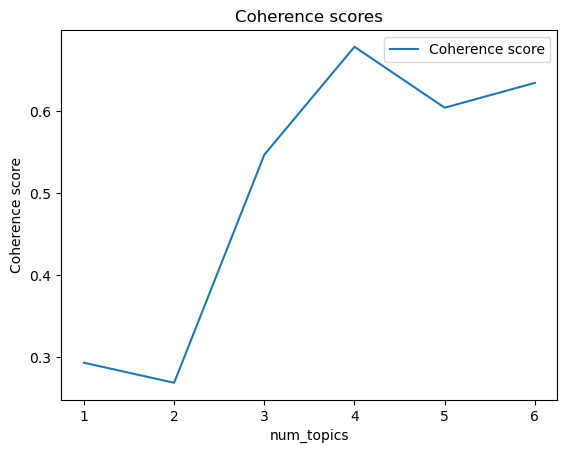

In [41]:
df.plot(title="Coherence scores", xlabel="num_topics", ylabel="Coherence score");

We are getting the best coherence score with `num_topics = 4`. That said, similar to other methods to pick the best hyperparameters in an unsupervised setting, take this with a grain of salt. The model with highest coherence score is not always going to be the best topic model. It's always a good idea to manually examine the topics resulted by the chosen number of topics and examine whether you are able to make sense of these topics or or not before finalizing the number of topics. In the end our goal is to get human interpretable topics, and that's what we should try to focus on.   

<br><br>

## Some recent topic modeling tools

### [Topic2Vec](https://top2vec.readthedocs.io/en/stable/Top2Vec.html)

What are some limitations of LDA and LSA?
- Need to know the number of topics in advance, which is hard for large and unfamiliar datasets
- Quality of topics is very much dependent upon the quality of preprocessing 
- They use bag-of-words (BOW) representations of documents as input which ignore word semantics. 
    - The words _study_ and _studying_ would be treated as different words despite their semantic similarity
    - Stemming or lemmatization can address this but lemmatization doesn't help to recognize _height_ and _tall_ are similar 

How does it work? 

- STEP 1: Create jointly embedded document and word vectors using Doc2Vec or Universal Sentence Encoder or BERT Sentence Transformer.
- STEP 2: Create lower dimensional embedding of document vectors using UMAP.
- STEP 3: Find dense areas of documents using HDBSCAN.
- STEP 4: For each dense area calculate the centroid of document vectors in original dimension, this is the topic vector.
- STEP 5: Find n-closest word vectors to the resulting topic vector.

![](img/top2vec.png)

[Source](https://arxiv.org/pdf/2008.09470.pdf)

Let's try it out to identify topics from [Ted talk titles](https://www.kaggle.com/datasets/miguelcorraljr/ted-talks-2022). 

In [42]:
talks_df = pd.read_csv('data/20221013_ted_talks.csv')
talks_df['title']

0                          Averting the climate crisis
1                                     Simplicity sells
2                                  Greening the ghetto
3                      The best stats you've ever seen
4                          Do schools kill creativity?
                             ...                      
5696                         Is inequality inevitable?
5697     4 ways to design a disability-friendly future
5698    Can exercise actually "boost" your metabolism?
5699     How did they build the Great Pyramid of Giza?
5700    How to squeeze all the juice out of retirement
Name: title, Length: 5701, dtype: object

In [43]:
documents = talks_df['title'].to_list()

In [48]:
from top2vec import Top2Vec

model = Top2Vec(documents,embedding_model='distiluse-base-multilingual-cased', min_count=5)

2023-04-11 12:23:12,712 - top2vec - INFO - Pre-processing documents for training
/Users/kvarada/opt/miniconda3/envs/575/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

2023-04-11 12:23:12,792 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2023-04-11 12:23:14,279 - top2vec - INFO - Creating joint document/word embedding
2023-04-11 12:23:51,990 - top2vec - INFO - Creating lower dimension embedding of documents
2023-04-11 12:23:54,527 - top2vec - INFO - Finding dense areas of documents
2023-04-11 12:23:54,629 - top2vec - INFO - Finding topics


In [49]:
# How many topics has it learned? 

model.get_num_topics() 

63

In [50]:
# What are the topic sizes? 

topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([336, 267, 246, 171, 160, 150, 145, 143, 139, 138, 133, 126, 121,
       114, 112, 108, 107, 104,  98,  97,  95,  94,  93,  93,  93,  90,
        89,  88,  87,  86,  85,  84,  81,  74,  72,  72,  71,  68,  66,
        64,  63,  62,  61,  61,  58,  55,  54,  53,  51,  48,  48,  47,
        45,  44,  44,  39,  33,  33,  32,  29,  29,  29,  23])

In [51]:
# What are the topic words? 

topic_words, word_scores, topic_nums = model.get_topics(10)
topic_words

array([['why', 'reasons', 'reason', 'causes', 'how', 'for', 'instead',
        'como', 'about', 'as', 'which', 'by', 'don', 'what', 'than',
        'like', 'when', 'shouldn', 'diseases', 'disease', 'isn', 'co',
        'fear', 'para', 'depression', 'aren', 'avoid', 'genetic',
        'poverty', 'autism', 'from', 'but', 'que', 'habits', 'riddle',
        'hate', 'makes', 'matters', 'means', 'to', 'matter', 'ep', 'of',
        'anxiety', 'wish', 'mean', 'is', 'who', 'myths', 'drugs'],
       ['how', 'ways', 'like', 'way', 'como', 'practice', 'avoid',
        'trick', 'by', 'overcome', 'through', 'habits', 'become', 'as',
        'instead', 'helping', 'prevent', 'cure', 'empathy', 'act',
        'treat', 'learn', 'survive', 'tips', 'difficult', 'learned',
        'compassion', 'helps', 'taught', 'works', 'teach', 'taking',
        'than', 'lesson', 'means', 'being', 'improve', 'for', 'working',
        'outsmart', 'healing', 'path', 'against', 'using', 'help',
        'across', 'why', 'wo

In [52]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

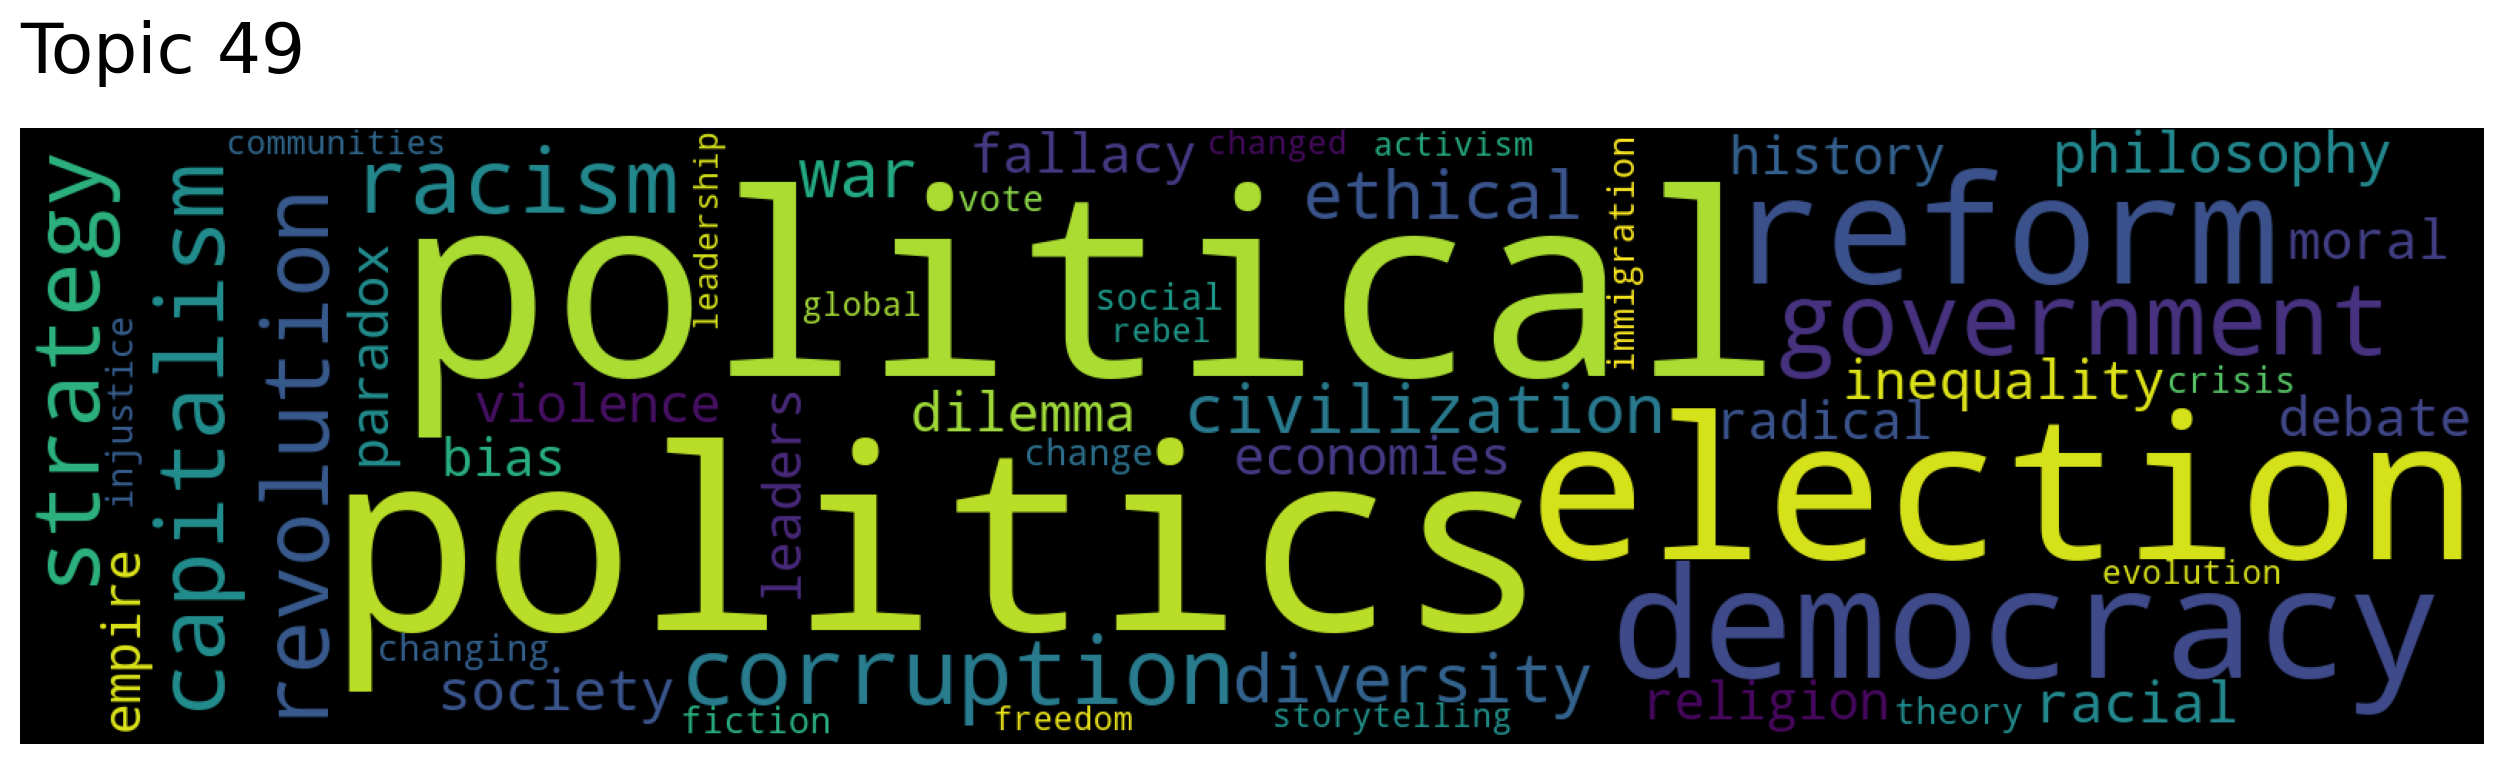

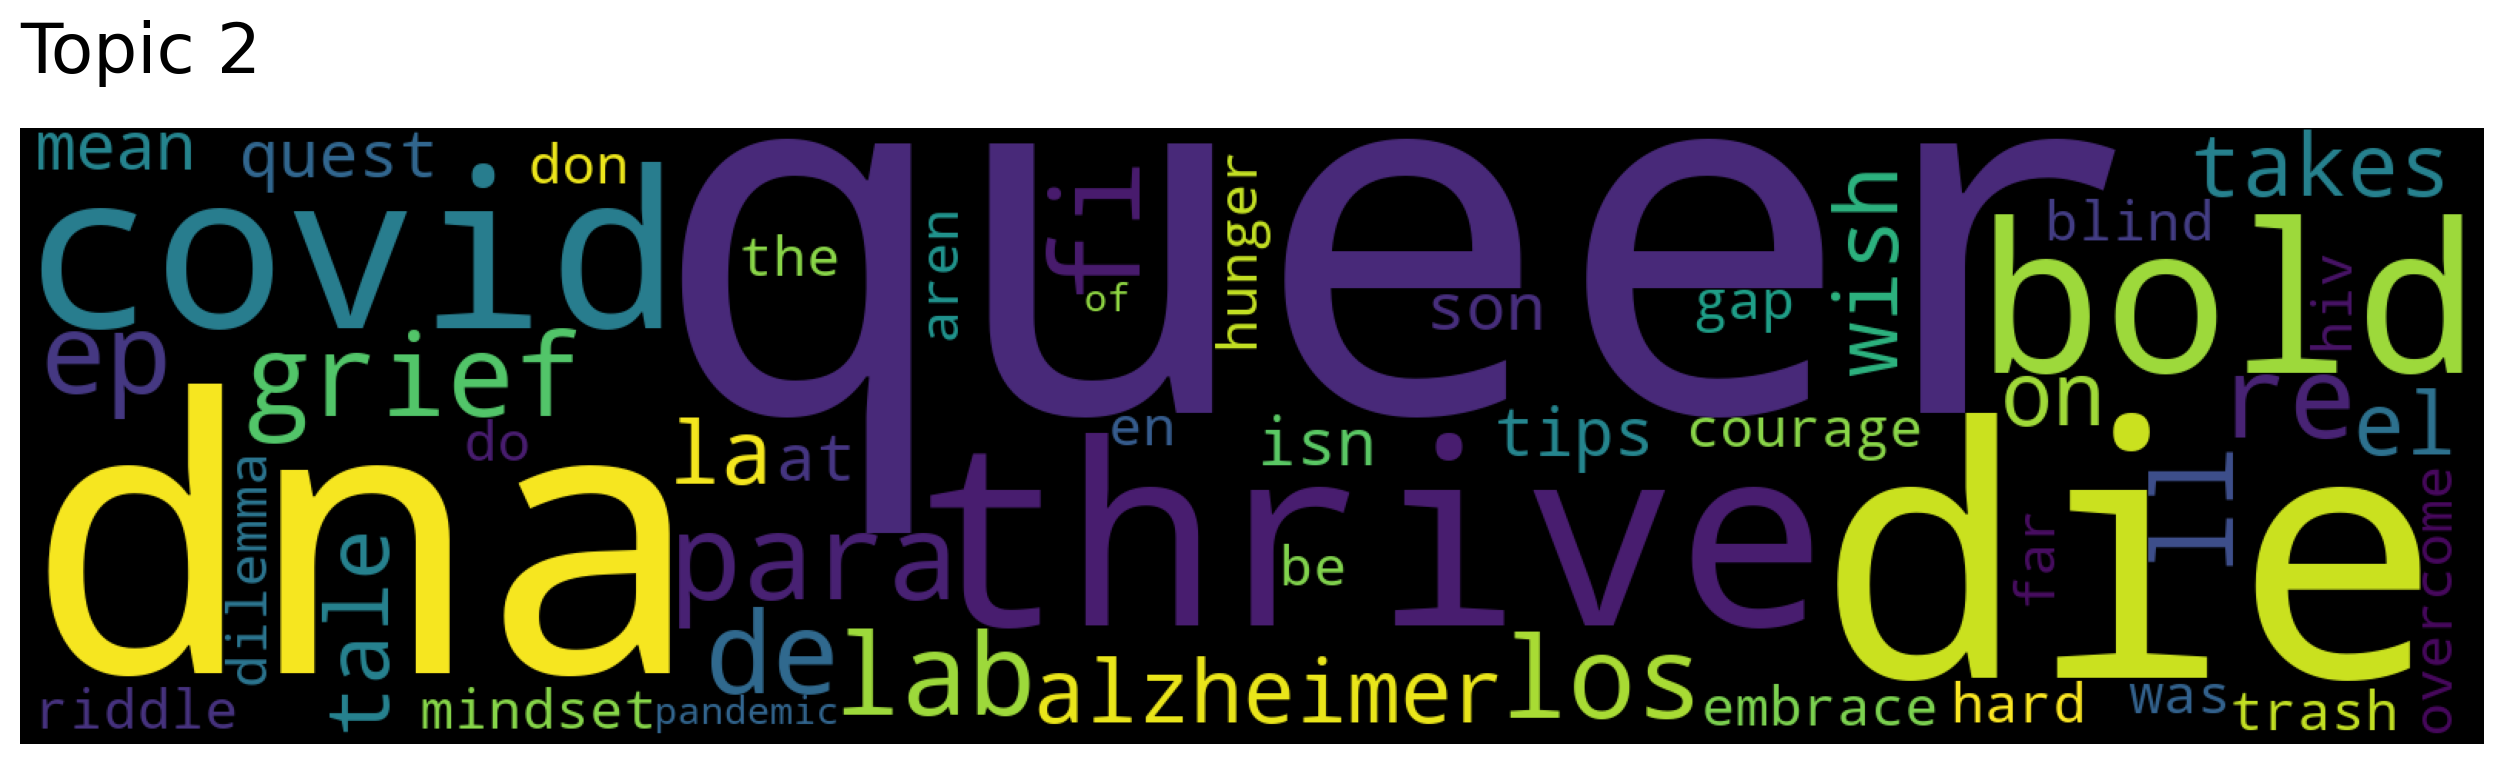

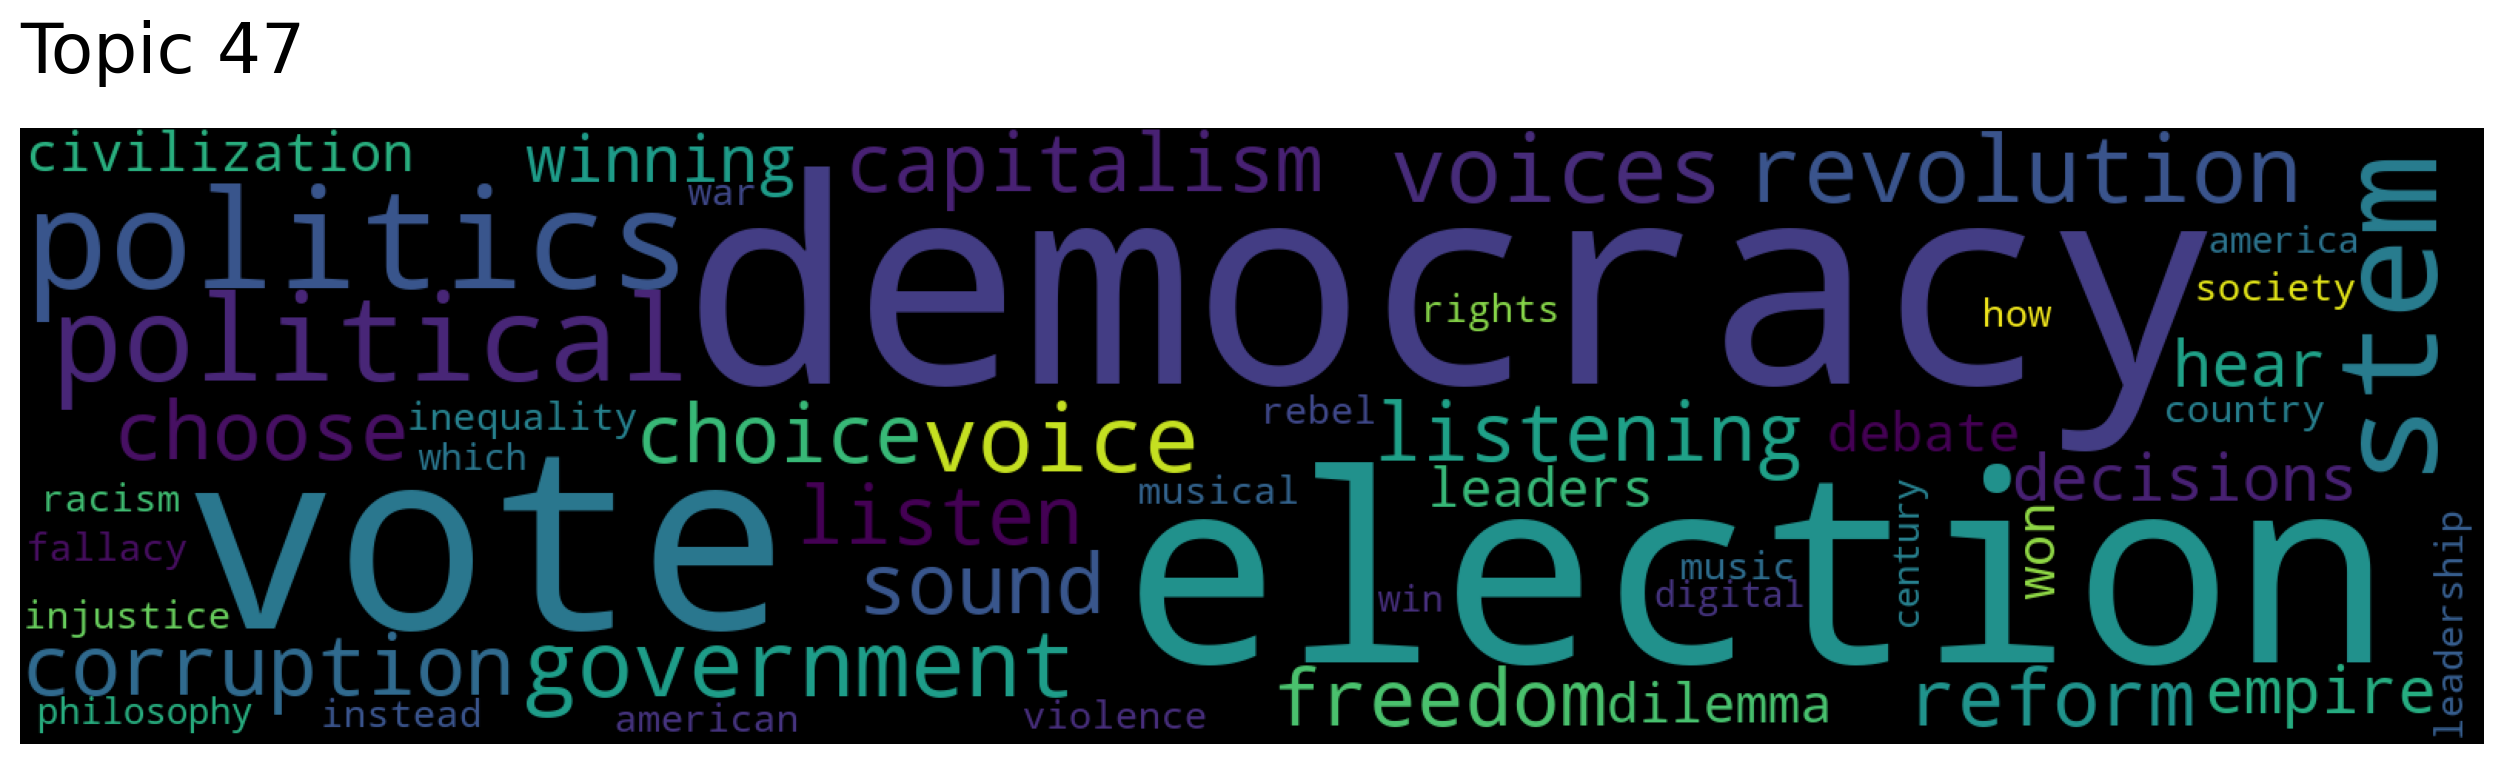

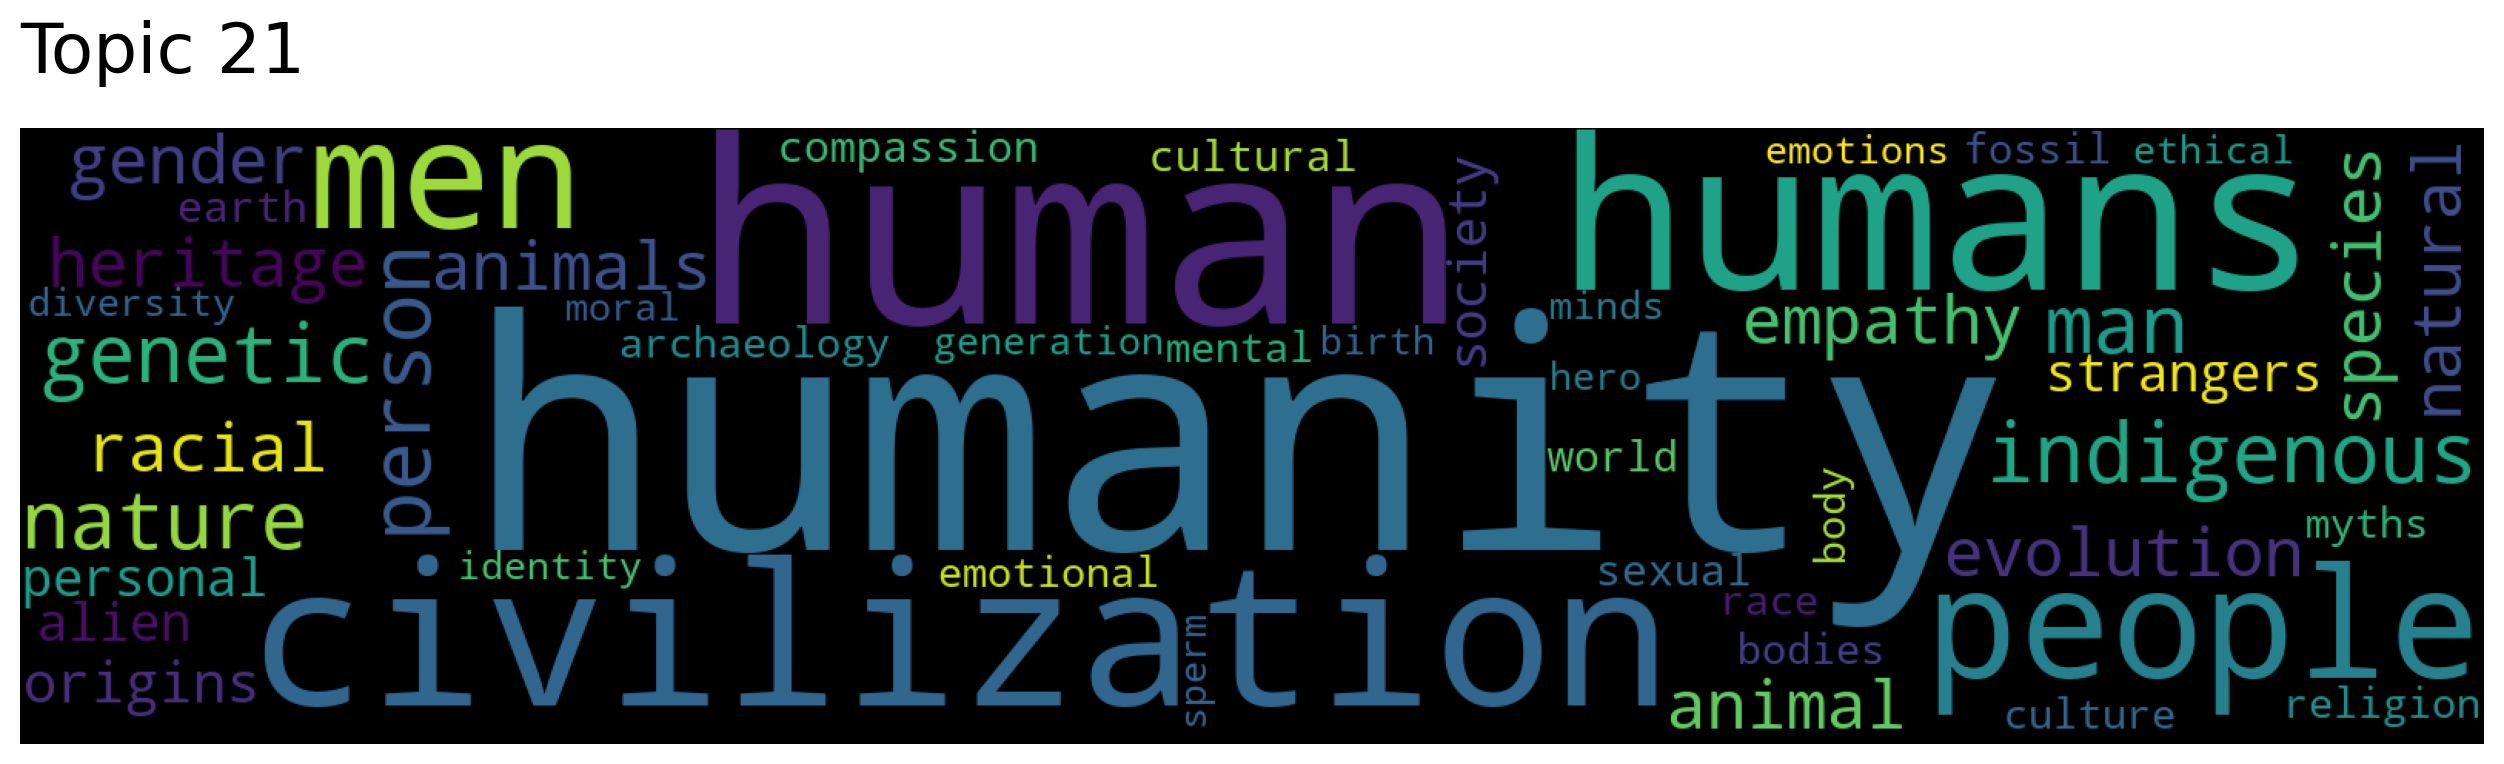

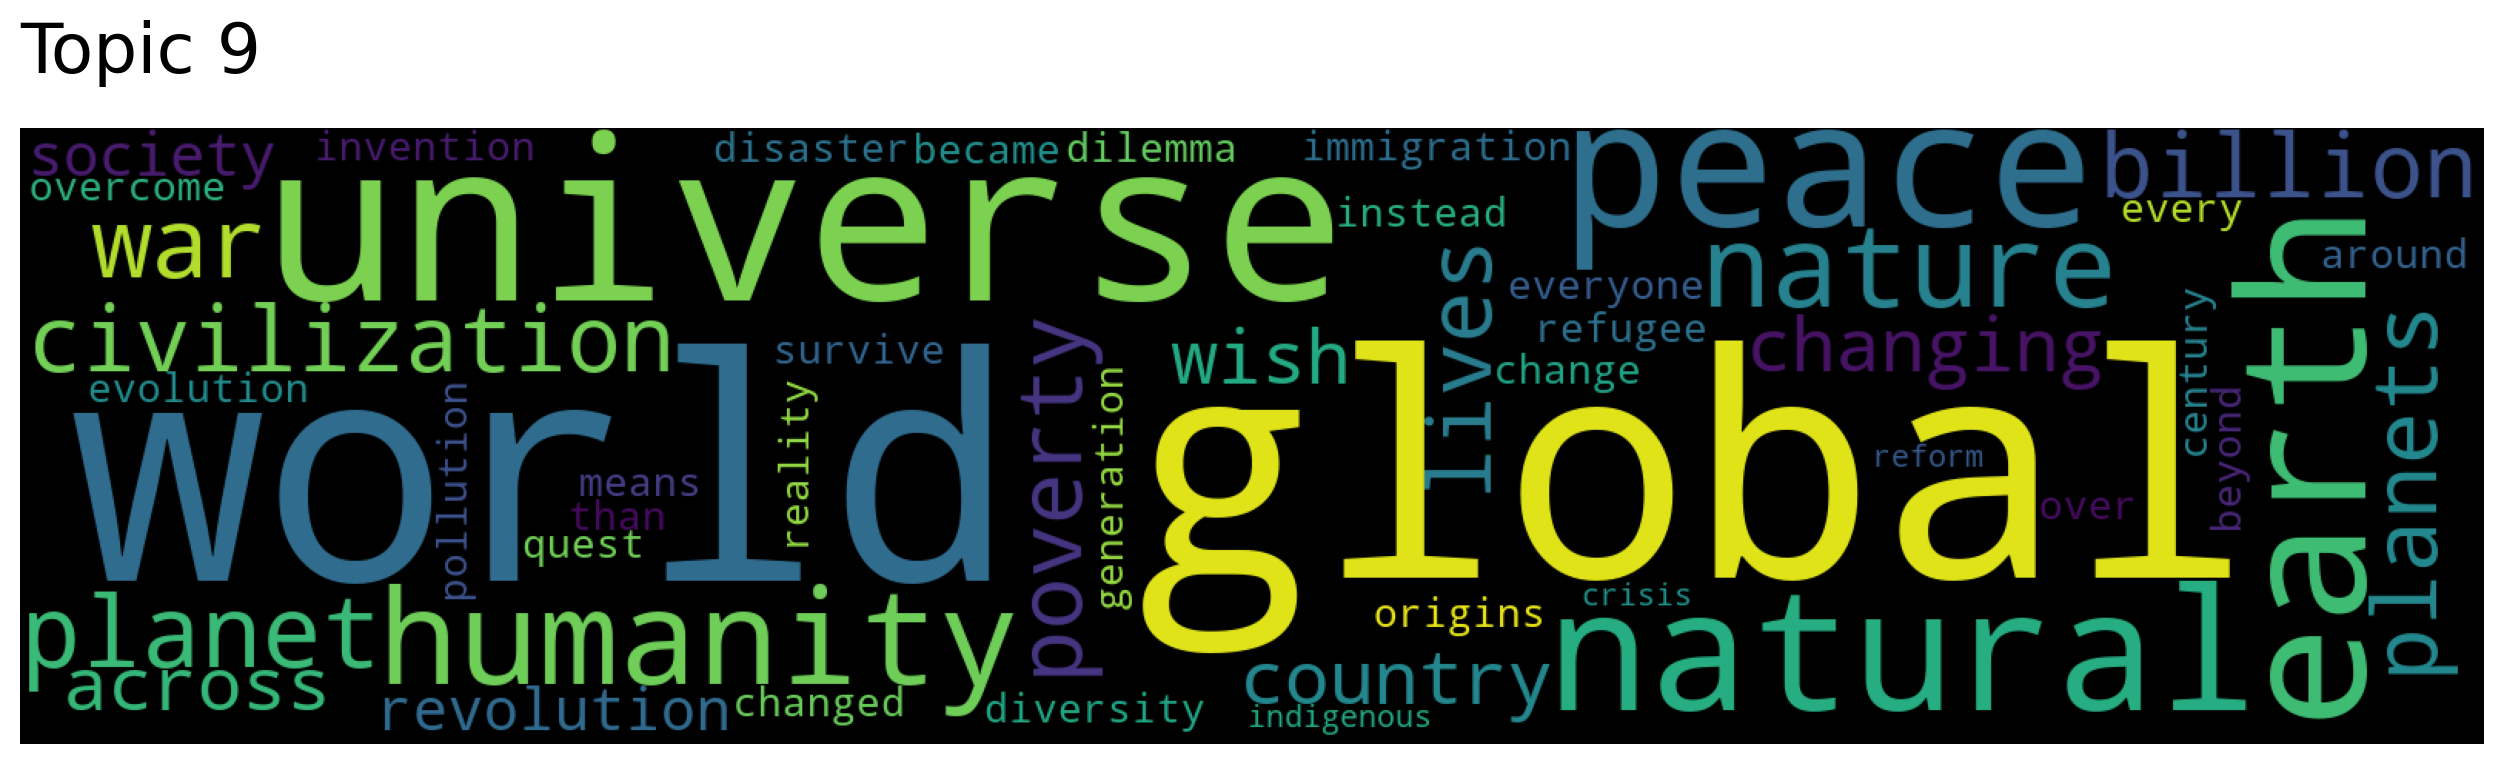

In [53]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], 
                                                                         num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [54]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=26, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 787, Score: 0.868497371673584
-----------
The brain in your gut
-----------

Document: 835, Score: 0.8576278686523438
-----------
Your brain on improv
-----------

Document: 153, Score: 0.8199856281280518
-----------
3 clues to understanding your brain
-----------

Document: 5567, Score: 0.7898889183998108
-----------
A brain implant that turns your thoughts into text
-----------

Document: 1037, Score: 0.7639772891998291
-----------
The divided brain
-----------



In [55]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["human", "love"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 5309, Score: 0.7995411634706191
-----------
"Being Human"
-----------

Document: 264, Score: 0.7060419223152715
-----------
On humanity
-----------

Document: 236, Score: 0.674595813339133
-----------
"Kounandi"
-----------

Document: 134, Score: 0.6194421980787758
-----------
"Woza"
-----------

Document: 3803, Score: 0.619280894265011
-----------
What is love?
-----------



In [56]:
topic_words, topic_vectors, topic_labels = model.get_topics()

In [57]:
topic_words

array([['why', 'reasons', 'reason', ..., 'who', 'myths', 'drugs'],
       ['how', 'ways', 'like', ..., 'workplace', 'learning', 'work'],
       ['queer', 'dna', 'die', ..., 'trash', 'pandemic', 'of'],
       ...,
       ['cars', 'driving', 'car', ..., 'shouldn', 'empathy', 'yourself'],
       ['smartphone', 'phone', 'mobile', ..., 'helps', 'capitalism',
        'trick'],
       ['plastic', 'synthetic', 'pollution', ..., 'microbes', 'reduce',
        'underwater']], dtype='<U14')

Another recent tool to know is [BERTopic](https://maartengr.github.io/BERTopic/index.html), which leverages transformers. 

<br><br><br><br>

## Final comments and summary

### Important ideas to know

- Topic modeling is a tool to uncover important themes in a large collection of documents.
- The overall goal is to tell a high-level story about a large collection of documents to humans. 

![](img/TM_health_topics_social_media.png)

<!-- <center> -->
<!-- <img src="img/TM_health_topics_social_media.png" height="900" width="900">  -->
<!-- </center> -->

(Credit: [Health topics in social media](https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0103408.g002))

- Latent dirichlet allocation (LDA) is a commonly used model for topic modeling, which is a Bayesian, probabilistic, and generative model. 
- Topic is something that influences the choice of vocabulary of a document. For each document, we assume that several topics are active with varying importance. 
- The primary idea of the model is 
    - A document is a mixture of topics 
    - A topic is a mixture of words in the vocabulary 

- You can carry out topic modeling with LDA in Python using the `Gensim` library. 
- Preprocessing is extremely important in topic modeling. 
- Some of the most common steps in preprocessing for topic modeling include
    - Sentence segmentation, tokenization, lemmatization, stopword and punctuation removal  
- You can visualize topic model using `pyLDAvis`. 
- There are more advanced and practical tools for topic modeling out there. Some examples include `Top2Vec` and `BERTopic` 

<br><br><br><br>

## Some useful resources and links 
- [LDA with `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
- [Jordan Boyd-Graber's very approachable explanation of LDA](https://www.youtube.com/watch?v=fCmIceNqVog)
- [lda2vec](https://github.com/cemoody/lda2vec)
- [Original topic modeling paper: David Blei et al. 2003](http://www.cs.columbia.edu/~blei/papers/BleiNgJordan2003.pdf)
- [Topic modeling for computational social scientists ](http://topicmodels.info/)
- [spaCy's Python for data science cheat sheet](http://datacamp-community-prod.s3.amazonaws.com/29aa28bf-570a-4965-8f54-d6a541ae4e06)
- If you want to learn more about practical aspects of LDA
    - [Rethinking LDA: Why Priors Matter](https://papers.nips.cc/paper/2009/hash/0d0871f0806eae32d30983b62252da50-Abstract.html)
    - [LDA Revisited: Entropy, Prior and Convergence](https://static.aminer.org/pdf/fa/cikm2016/lfp0616-zhangAemb.pdf)